In [91]:
# import libraries
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.utils import resample
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [92]:
# Importing the dataset
dataset = pd.read_csv('heart_2020_cleaned.csv')
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [93]:
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Explanation of the variables of the dataset
1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?

In [94]:
dataset.shape

(319795, 18)

In [95]:
# looking at general infromation about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [96]:
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [97]:
# looking for NAN values
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [98]:
# Looking for duplicated rows
dataset.duplicated().sum()

18078

In [99]:
dataset[dataset.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [100]:
dataset.drop_duplicates(inplace=True)

In [101]:
dataset.shape

(301717, 18)

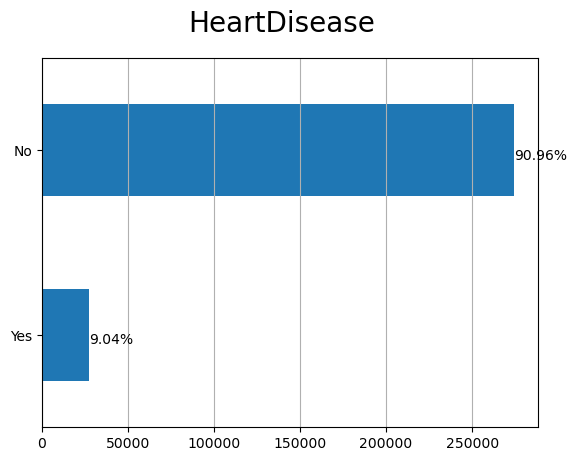

In [102]:
y=dataset['HeartDisease']
ax = dataset['HeartDisease'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('HeartDisease', fontsize=20)
plt.show()

In [103]:
for col in dataset.columns:
    print(f'column {col}')
    print('***********************************')
    print(dataset[col].value_counts(),'\n')

column HeartDisease
***********************************
No     274456
Yes     27261
Name: HeartDisease, dtype: int64 

column BMI
***********************************
26.63    3244
27.46    2425
27.44    2385
24.41    2173
27.12    2062
         ... 
63.85       1
48.34       1
30.97       1
68.16       1
46.56       1
Name: BMI, Length: 3604, dtype: int64 

column Smoking
***********************************
No     174312
Yes    127405
Name: Smoking, dtype: int64 

column AlcoholDrinking
***********************************
No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64 

column Stroke
***********************************
No     289653
Yes     12064
Name: Stroke, dtype: int64 

column PhysicalHealth
***********************************
0.0     208611
30.0     19503
2.0      14846
1.0      10459
3.0       8608
5.0       7590
10.0      5450
15.0      5012
7.0       4629
4.0       4467
20.0      3216
14.0      2892
6.0       1270
25.0      1164
8.0        924
21.0       626
1

In [104]:
dataset['HeartDisease'].replace({'Yes':1, 'No':0 })
dataset=dataset.apply(pd.to_numeric,errors="ignore")

In [108]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [109]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


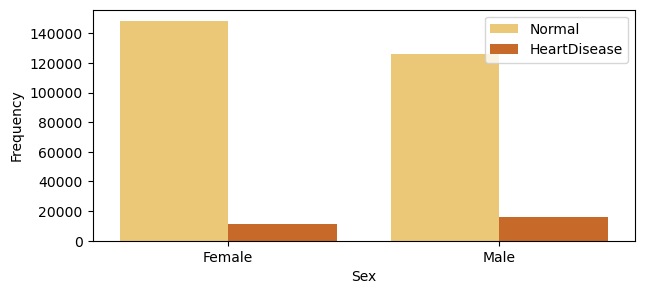

In [123]:

plt.figure(figsize = (7,3))
sns.countplot(x = dataset['Sex'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")
plt.xlabel('Sex')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- Remember that number one refers to men and 0 refers to women on the x-axis.
- Most cases of heart disease are men 
- Most cases that got no hart disease are women

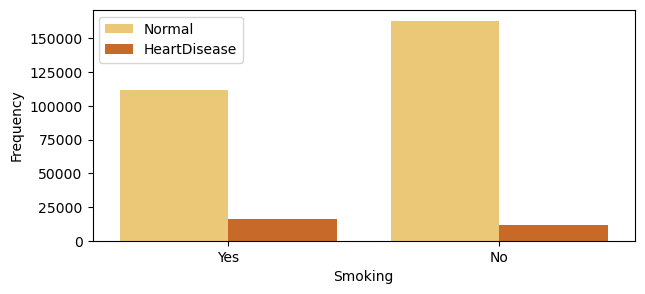

In [127]:

plt.figure(figsize = (7,3))
sns.countplot(x = dataset['Smoking'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")
plt.xlabel('Smoking')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- For smokers, they are the largest group that suffers from heart disease.
- There are also cases of heart disease, although they don't  smoke, this is related to other factors.

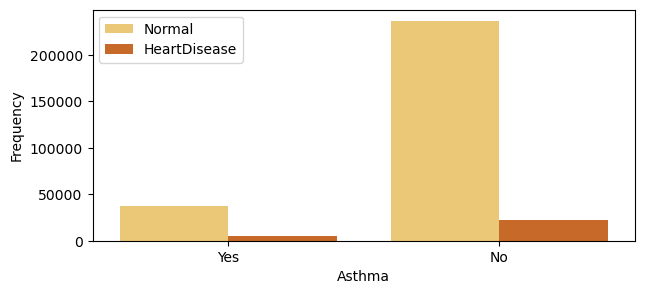

In [128]:

plt.figure(figsize = (7,3))
sns.countplot(x = dataset['Asthma'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to Asthma.")
plt.xlabel('Asthma')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

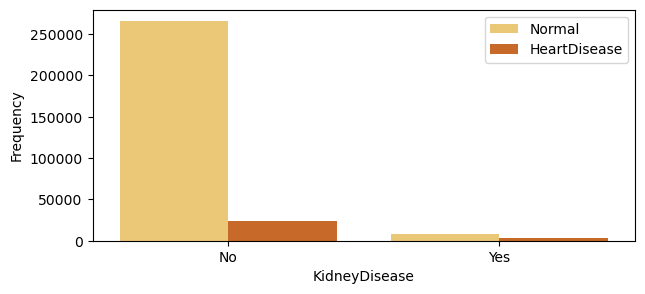

In [129]:

plt.figure(figsize = (7,3))
sns.countplot(x = dataset['KidneyDisease'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydiseaset.")
plt.xlabel('KidneyDisease')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

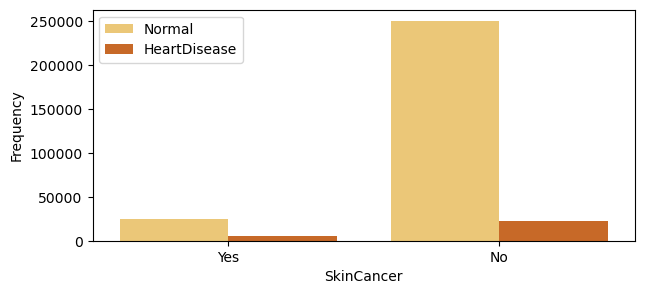

In [130]:

plt.figure(figsize = (7,3))
sns.countplot(x = dataset['SkinCancer'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer.")
plt.xlabel('SkinCancer')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

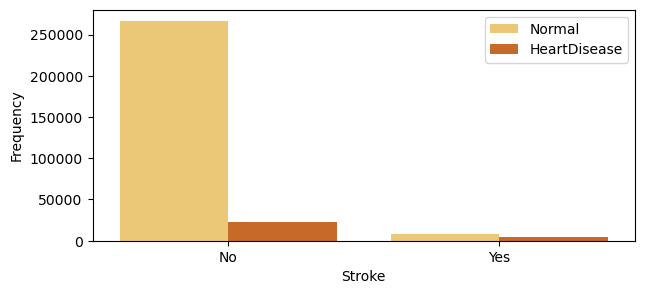

In [132]:


plt.figure(figsize = (7,3))
sns.countplot(x = dataset['Stroke'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke.")
plt.xlabel('Stroke')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

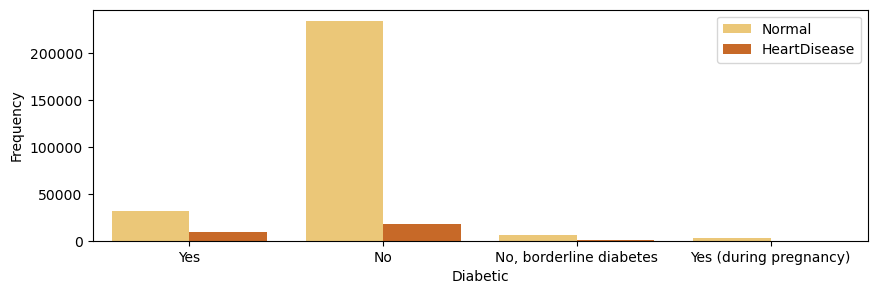

In [134]:
plt.figure(figsize = (10,3))
sns.countplot(x = dataset['Diabetic'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic.")
plt.xlabel('Diabetic')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

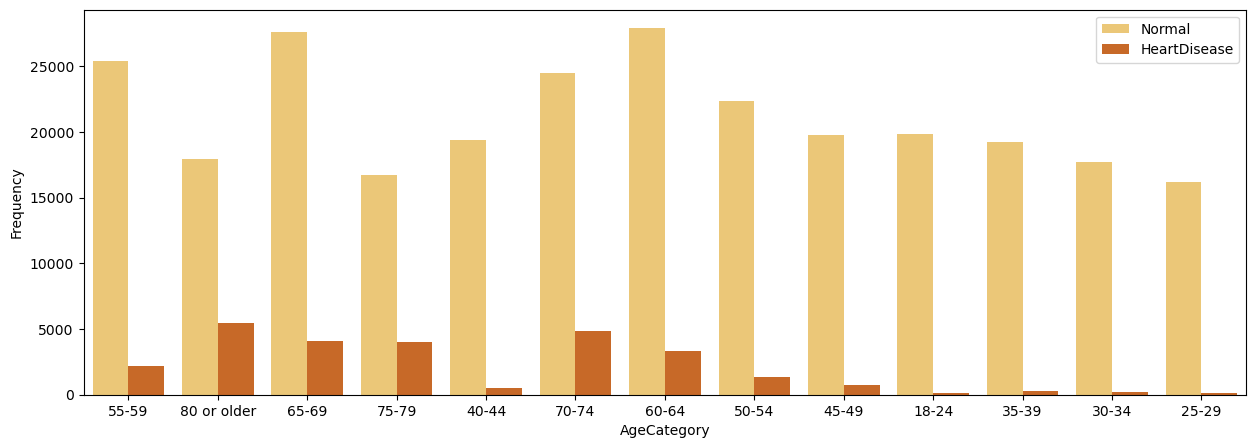

In [117]:
plt.figure(figsize = (15,5))
sns.countplot(x = dataset['AgeCategory'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()


- We can see that people who are 80 or older are more likely to get HeartDiseases.

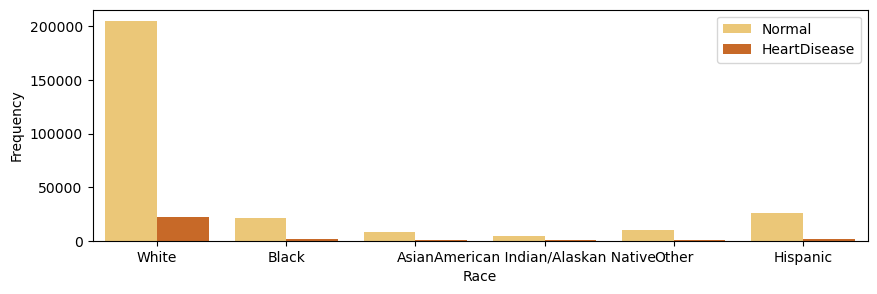

In [114]:
plt.figure(figsize = (10,3))
sns.countplot( x= dataset['Race'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- We can see that white people are more susceptible to heart disease.

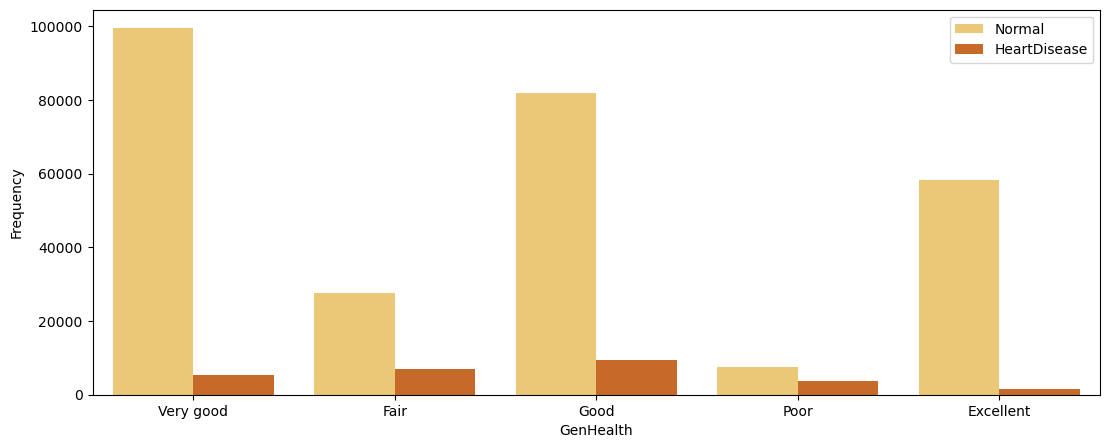

In [135]:
plt.figure(figsize = (13,5))
sns.countplot( x= dataset['GenHealth'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
plt.xlabel('GenHealth')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

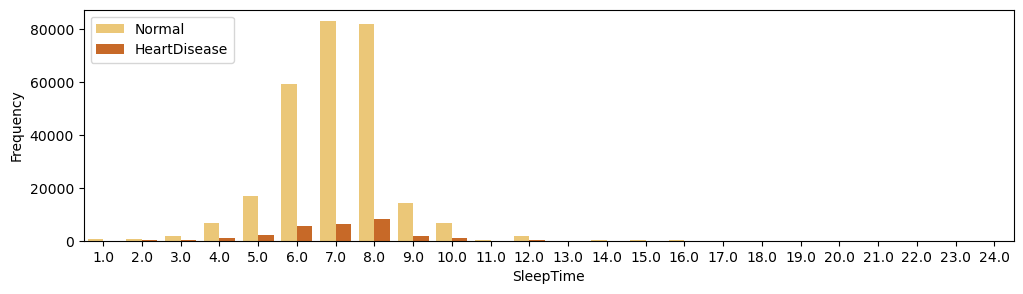

In [136]:
plt.figure(figsize = (12,3))
sns.countplot( x= dataset['SleepTime'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
plt.xlabel('SleepTime')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

In [137]:
def utils_recognize_type(dataset, col, max_cat=20):
    if (dataset[col].dtype == "O") | (dataset[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [138]:
non_categerocial_feauters=[]
Categerocial_feauters= []
dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
for k,v in dic_cols.items():
 if v == "num":
    non_categerocial_feauters.append(k)
 else:
    Categerocial_feauters.append(k)  


In [139]:
#label encoder
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        #columnsToEncode = list(df.select_dtypes(include=['category','object']))
       # columnsToEncode = list(Multi_Categerocial_feauters)
        columnsToEncode = list(Categerocial_feauters)

        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
dummyEncode(dataset)
dataset.head(10)  

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


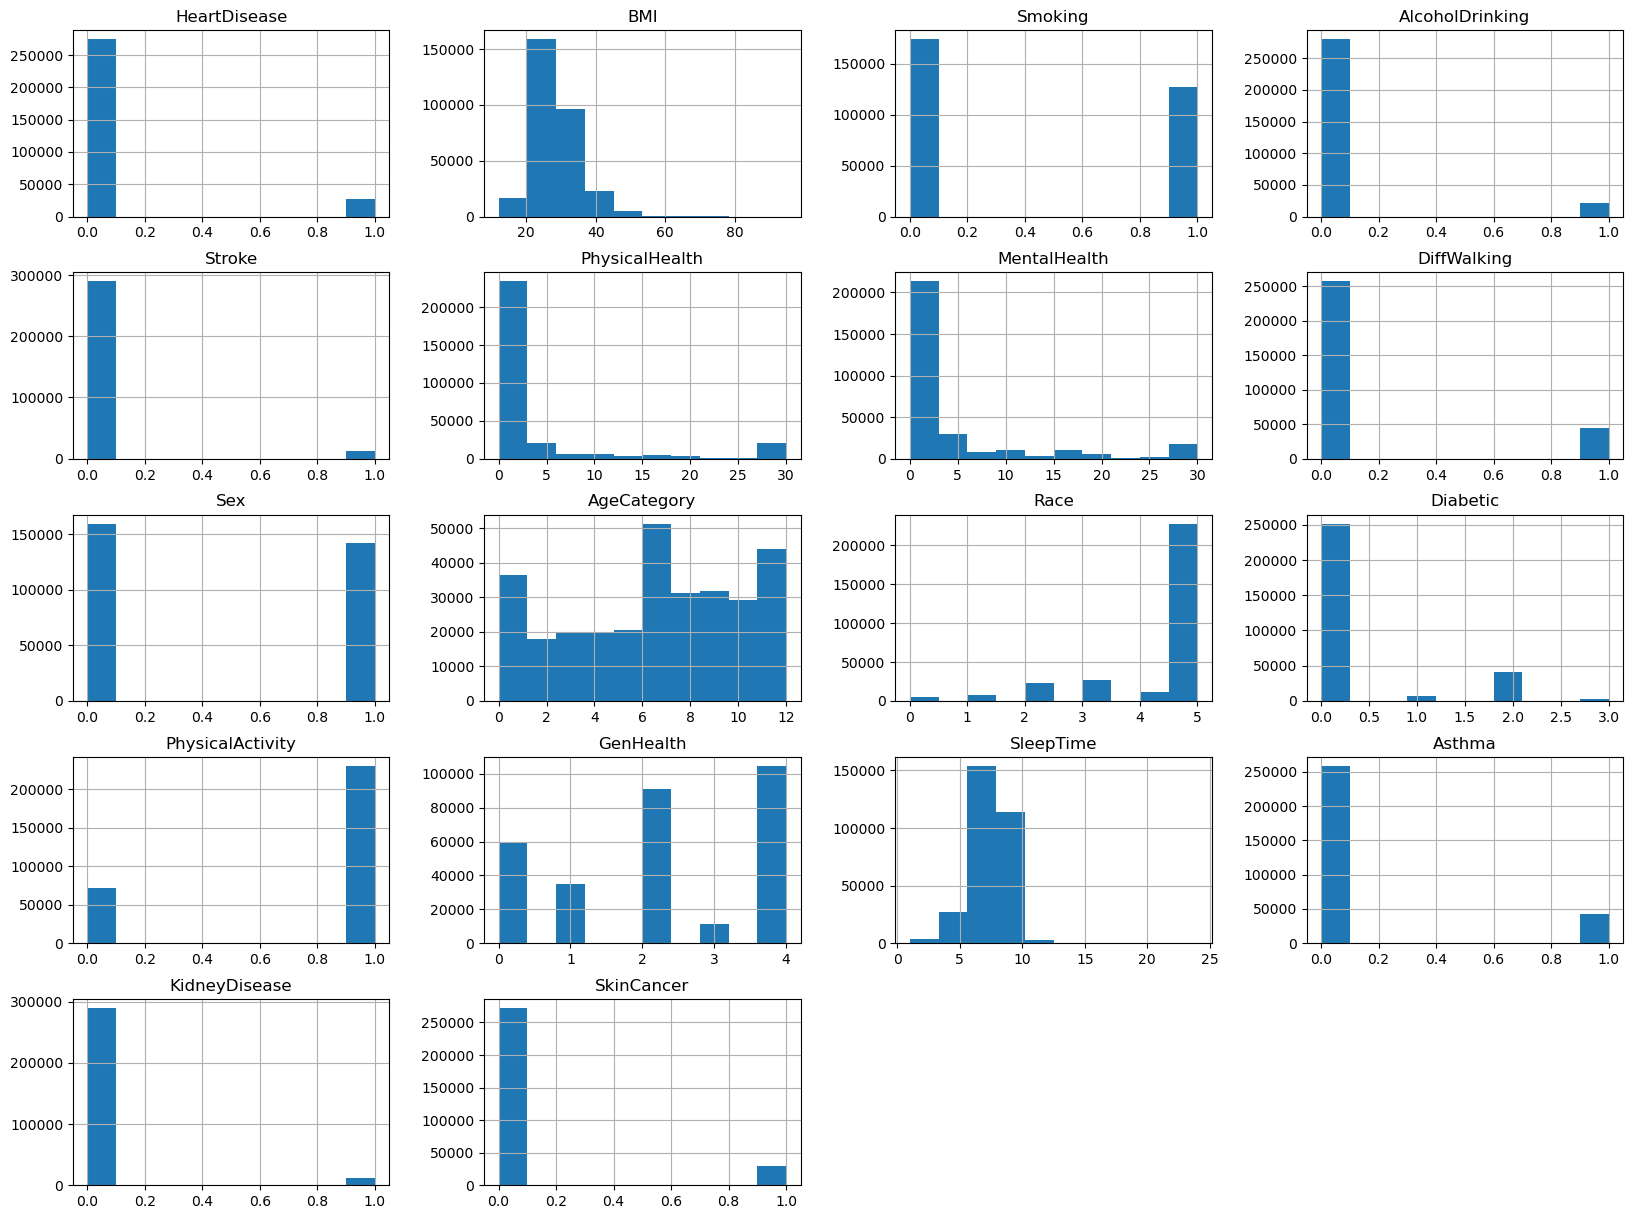

In [140]:
dataset.hist(figsize=(20,15))
plt.show();

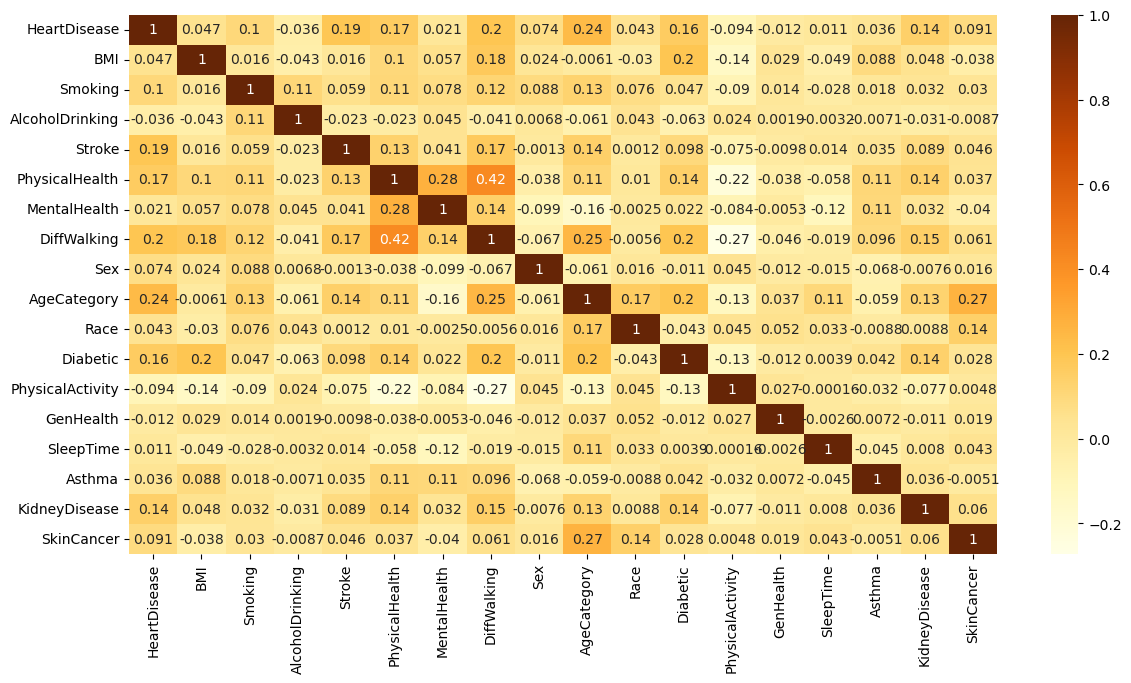

In [141]:
cor =dataset.corr()
plt.figure(figsize = (14,7))
sns.heatmap(cor,annot=True,cmap = 'YlOrBr');

In [229]:
dataset.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [230]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [231]:
X = dataset.iloc[:,1:] 
y = dataset.iloc[:, 0]

X


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [232]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

In [233]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
130672,26.00,0,0,0,0.0,1.0,0,1,11,5,0,1,4,7.0,0,0,0
279739,27.89,1,0,0,0.0,0.0,0,1,12,5,0,1,2,8.0,0,0,0
280861,17.75,0,0,0,2.0,10.0,0,0,8,5,0,1,4,8.0,0,0,0
204920,20.41,0,0,0,2.0,2.0,0,0,11,5,0,1,2,8.0,0,0,0
293615,28.19,0,0,0,0.0,0.0,0,1,11,5,1,0,2,9.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123014,27.57,0,0,0,0.0,0.0,0,0,8,5,2,0,2,6.0,0,0,0
273086,17.97,1,0,0,0.0,25.0,0,0,1,4,0,0,2,8.0,1,0,0
135728,28.34,0,0,0,9.0,20.0,1,0,8,5,0,0,2,6.0,1,0,0
151731,22.43,1,0,0,5.0,30.0,1,0,6,5,2,1,1,6.0,1,0,0


In [234]:
y_train

130672    0
279739    0
280861    0
204920    0
293615    1
         ..
123014    0
273086    0
135728    0
151731    1
125198    0
Name: HeartDisease, Length: 226287, dtype: int32

In [235]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
284798,35.59,0,0,0,0.0,2.0,1,0,9,2,0,1,4,8.0,0,0,0
206219,27.80,0,0,0,0.0,0.0,0,1,11,2,2,1,2,8.0,1,0,0
298442,25.79,0,0,0,2.0,2.0,0,0,6,5,0,1,4,8.0,0,0,0
119751,38.47,1,0,1,1.0,1.0,0,0,6,2,2,1,2,10.0,0,0,0
103309,27.32,0,0,0,0.0,2.0,0,0,4,2,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,30.47,0,0,0,0.0,0.0,0,0,7,5,0,0,2,7.0,0,0,0
105364,38.97,0,0,0,7.0,0.0,0,0,3,2,0,1,1,6.0,0,0,0
198456,26.63,0,0,0,0.0,21.0,0,1,8,3,0,1,1,6.0,0,0,0
255102,27.71,1,0,0,0.0,0.0,0,1,9,5,0,1,0,6.0,0,0,0


In [236]:
y_test 

284798    0
206219    0
298442    0
119751    1
103309    0
         ..
77280     0
105364    0
198456    0
255102    0
237115    0
Name: HeartDisease, Length: 75430, dtype: int32

In [237]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [238]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression(random_state = 0)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [239]:
#training score
LogisticRegressionModel.score(X_train, y_train)

0.9103527820864654

In [245]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = np.round(LogisticRegressionModel.predict(X_test)).astype(int)

print('accuracy=', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy= 0.9098634495558796
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.50      0.09      0.15      6803

    accuracy                           0.91     75430
   macro avg       0.71      0.54      0.55     75430
weighted avg       0.88      0.91      0.88     75430



In [246]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[68047,   580],
       [ 6219,   584]], dtype=int64)

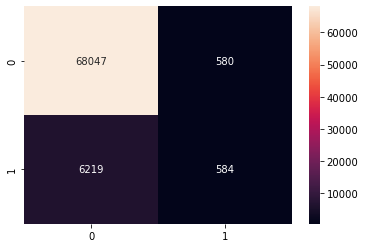

In [247]:
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

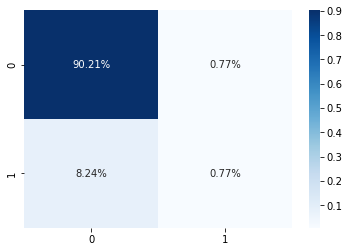

In [248]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [249]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
RFclassifier.fit(X_train, y_train)

Y_pred = RFclassifier.predict(X_test)
score = RFclassifier.score(X_train, y_train)
print('Training Score:', score)
score = RFclassifier.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 0.9972777932448617
Testing Score: 0.8993371337664059
   Predicted
0          0
1          0
2          0
3          0
4          0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68627
           1       0.33      0.11      0.17      6803

    accuracy                           0.90     75430
   macro avg       0.62      0.55      0.56     75430
weighted avg       0.86      0.90      0.88     75430



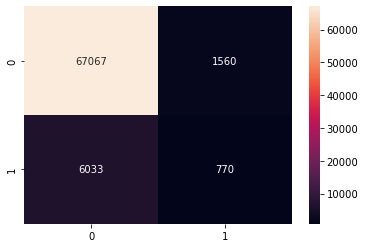

In [250]:
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

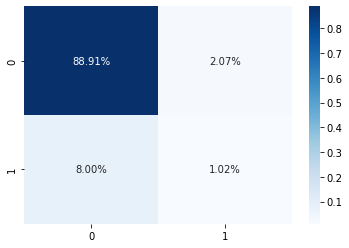

In [251]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [253]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)
Y_pred = KNNclassifier.predict(X_test)
trainscore = KNNclassifier.score(X_train, y_train)
print('Training Score:', trainscore)
testscore = KNNclassifier.score(X_test, y_test)
print('Testing Score:', testscore)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.9209632015979707
Testing Score: 0.898992443324937
   Predicted
0          0
1          0
2          0
3          0
4          0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68627
           1       0.34      0.13      0.19      6803

    accuracy                           0.90     75430
   macro avg       0.63      0.55      0.57     75430
weighted avg       0.87      0.90      0.88     75430



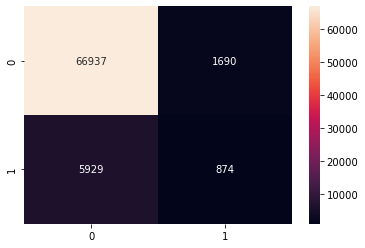

In [254]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

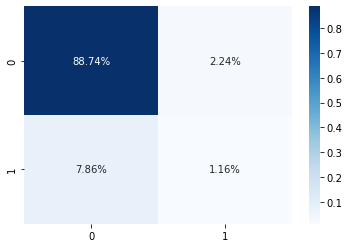

In [255]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [259]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
#from keras import regularizer


#create model 
classifier = Sequential()
classifier.add(Dense(16, input_dim=17, kernel_initializer='uniform',  activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(classifier.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                288       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None


In [260]:
history=classifier.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=10)


Epoch 1/30
22629/22629 [==============================] - 20s 887us/step - loss: 0.2535 - accuracy: 0.9092 - val_loss: 0.2445 - val_accuracy: 0.9104
Epoch 2/30
22629/22629 [==============================] - 19s 841us/step - loss: 0.2440 - accuracy: 0.9105 - val_loss: 0.2430 - val_accuracy: 0.9105
Epoch 3/30
22629/22629 [==============================] - 21s 928us/step - loss: 0.2434 - accuracy: 0.9102 - val_loss: 0.2419 - val_accuracy: 0.9110
Epoch 4/30
22629/22629 [==============================] - 22s 952us/step - loss: 0.2424 - accuracy: 0.9104 - val_loss: 0.2420 - val_accuracy: 0.9110
Epoch 5/30
22629/22629 [==============================] - 20s 904us/step - loss: 0.2422 - accuracy: 0.9102 - val_loss: 0.2415 - val_accuracy: 0.9110
Epoch 6/30
22629/22629 [==============================] - 20s 863us/step - loss: 0.2418 - accuracy: 0.9106 - val_loss: 0.2411 - val_accuracy: 0.9109
Epoch 7/30
22629/22629 [==============================] - 21s 938us/step - loss: 0.2414 - accuracy: 0.9104

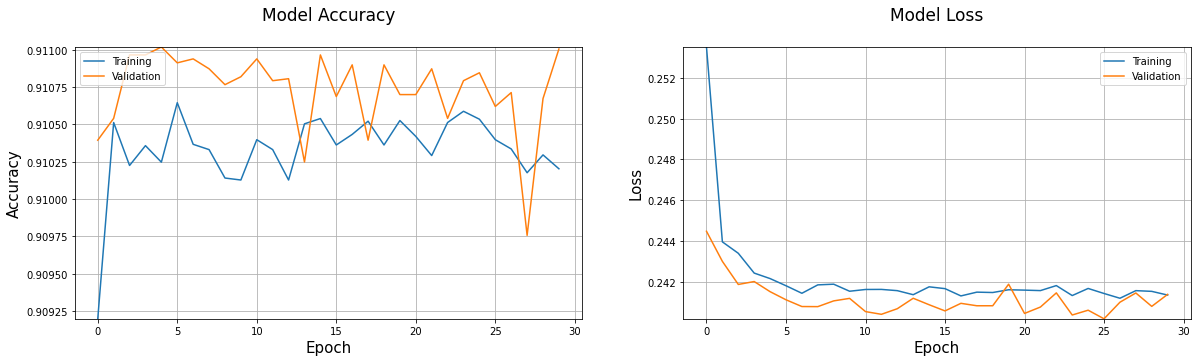

In [261]:

ylim_pad=[0, 0]
xlabel = 'Epoch'
legends = ['Training', 'Validation']
plt.figure(figsize=(20, 5))
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]
plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
y1 = history.history['loss']
y2 = history.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper right')
plt.grid()
plt.show()

In [262]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = np.round(classifier.predict(X_test)).astype(int)

print('accuracy=', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

2358/2358 [==============================] - 1s 447us/step
accuracy= 0.9110035794776614
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68627
           1       0.61      0.04      0.07      6803

    accuracy                           0.91     75430
   macro avg       0.76      0.52      0.51     75430
weighted avg       0.89      0.91      0.87     75430



In [263]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[68466,   161],
       [ 6552,   251]], dtype=int64)

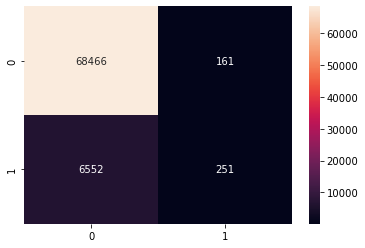

In [264]:
f = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

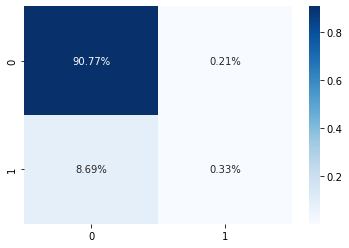

In [265]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [266]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=70)
xgb.fit(X_train, y_train)
print('train score=', xgb.score(X_train, y_train))
preds = xgb.predict(X_test)
print('test score=', xgb.score(X_test,y_test))


train score= 0.9158148722639834
test score= 0.9110168368023333


In [267]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.54      0.09      0.16      6803

    accuracy                           0.91     75430
   macro avg       0.73      0.54      0.56     75430
weighted avg       0.88      0.91      0.88     75430



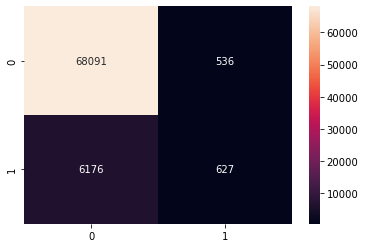

In [268]:
cm = confusion_matrix(y_test,preds)
f = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

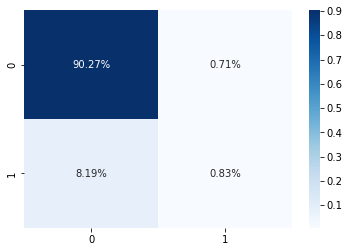

In [269]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')